## 1. Compute tokens, types, and TTR (Just present/print the stats related to each. DO NOT have a statement that prints all thetokens in the pynb)

In [60]:
!pip install tweet-preprocessor

import preprocessor as p
import pandas as pd
import re
from google.colab import files
import io
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
#chose file to work on
uploaded = files.upload()


Saving tweets-dataset.csv to tweets-dataset.csv


In [0]:
#read datafile
datfram = pd.read_csv(io.BytesIO(uploaded['tweets-dataset.csv']))

#datfram

In [0]:
#removing usernames, hashtags, and links
datfram['Refined Sentences'] = datfram['Sentence'].apply(p.clean)

#removing punctuations
datfram['Refined Sentences'] = datfram['Refined Sentences'].apply(lambda sentence: re.sub(r'\s[^\w\s]',' ',sentence))
datfram['Refined Sentences'] = datfram['Refined Sentences'].apply(lambda sentence: re.sub(r'\s[^\w\s]',' ',sentence))

#tokenising
datfram['Tokens In Sentences'] = datfram['Refined Sentences'].apply(lambda sentence: nltk.word_tokenize(sentence))
datfram['Number of Tokens'] = datfram['Tokens In Sentences'].apply(lambda tokens: len(tokens))

#datfram

In [0]:
#intermediate steps for referencing
datfram['Types In Sentences'] = datfram['Tokens In Sentences'].apply(lambda tokens: set(tokens))
datfram['Number of Types'] = datfram['Types In Sentences'].apply(lambda types: len(types))

#datfram

In [0]:
#intermediate steps for referencing
datfram['TTR Per Sentence'] = datfram['Number of Types']/datfram['Number of Tokens']

#datfram

In [181]:
#extracting all tokens
tokens = [token for row in datfram['Tokens In Sentences'].tolist() for token in row]
print('Total Number of Tokens:', len(tokens))

#tokens

Total Number of Tokens: 309384


In [182]:
#extracting all types
types = set(tokens)
print('Total Number of Types:', len(types))

#types

Total Number of Types: 39362


In [183]:
# finding TTR for th e entire corpus
TTR = len(types)/len(tokens)
print('TTR = ', TTR)

TTR =  0.1272270059214439


## 2. Check if Zipf’s Law holds true for meanings and length. (You can take some 10-20 random words (for which the meanings exists), get their meanings and work with those)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


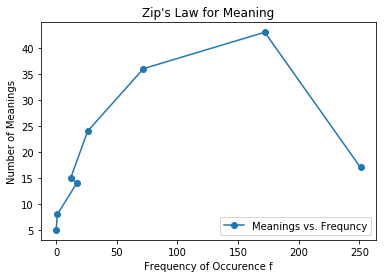

In [184]:
#meaning vs. frequency

import matplotlib.pyplot as plt
nltk.download('wordnet')
from nltk.corpus import wordnet
from collections import Counter

# taking 8 random words 
words=['tire','mint','stuff','air','left','right','best','out']

dfm=pd.DataFrame({'Words':words})
dfm['Meanings']=dfm['Words'].apply(wordnet.synsets)
dfm['Total Number of Meanings']=dfm['Meanings'].apply(len)

# calculating word's frequency
freq=[]
for word in words:
    freq.append(Counter(tokens)[word])

# also calcuating square root if required for plotting
dfm['Frequency']=freq
dfm['Square Root of Frequency']=dfm['Frequency']**(1/2)

# plotting (slight deviation seen from ideal graph since corpus size os not large enough and tokens contain multiple unwanted words such as unrecognised hindi words)
pt = plt.plot(dfm['Frequency'],dfm['Total Number of Meanings'],marker='o')
label1 = ['Meanings vs. Frequncy']
plt.legend(pt,label1,loc=4)
plt.xlabel('Frequency of Occurence f') 
plt.ylabel('Number of Meanings') 
plt.title('Zip\'s Law for Meaning') 
plt.show()



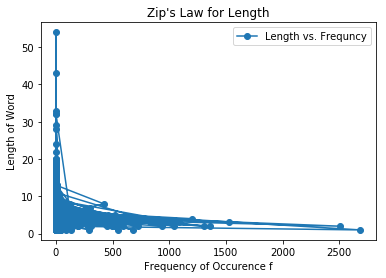

In [189]:
# length vs. frequency

# taking into consideration a very large corpus (first 10k words-complete corpus not used to reduce computation time. 
# However the graph obtained using complete corpus and with this corpus are identical)
dfl=pd.DataFrame({'Words':list(types)[0:10000]})

freq_t=[]
for word in list(types)[0:10000]:
    freq_t.append(Counter(tokens)[word])
dfl['Frequency']=freq_t 
dfl['Word Lengths']=dfl['Words'].apply(len)


# plotting (graph not ideal since corpus size is not large enough and tokens contain multiple unwanted words such as unrecognised hindi words)
pt = plt.plot(dfl['Frequency'],dfl['Word Lengths'],marker='o')
label2 = ['Length vs. Frequncy']
plt.legend(pt,label2,loc=1)
plt.xlabel('Frequency of Occurence f') 
plt.ylabel('Length of Word') 
plt.title('Zip\'s Law for Length') 
plt.show()





## 3. Plot Heap’s Law

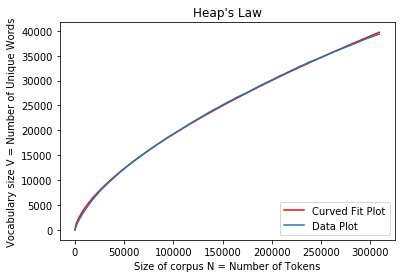

In [186]:
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import numpy as np

#defining relation
def func(n, k, beta):
    return k * np.power(n,beta)

n=[]
k=[]
token=[]

#defininig corpus taking at each step
for i in range(0,len(tokens),1000):
    token=tokens[0:i]
    n.append(len(token)) 
    k.append(len(set(token)))


#finding k and beta by curve fitting
k_and_beta, curv = curve_fit(func, n, k)


#plotting output
pt = []
pt = pt + plt.plot(n, func(n, *k_and_beta), 'r-')
pt = pt + plt.plot(n,k)
labels = ['Curved Fit Plot','Data Plot']
plt.legend(pt,labels,loc=4)
plt.xlabel('Size of corpus N = Number of Tokens') 
plt.ylabel('Vocabulary size V = Number of Unique Words') 
plt.title('Heap\'s Law') 
plt.show() 